## Exploratory Analysis - Google Books Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('New_google_api_dataset.csv')
df.head(20)

,Unnamed: 0,title,authors,publisher,published_date,description,ISBN10/ISBN13,page_count,categories,average_rating,ratings_count,language,preview_link,image_link,maturity_rating,ebook_availability,viewability
0,0,Out,NaN,NaN,1999-01,"Out is a fashion, style, celebrity and opinion...",NaN,112.0,NaN,0.000,0.000000,en,http://books.google.com/books?id=L2IEAAAAMBAJ&...,http://books.google.com/books/content?id=L2IEA...,NOT_MATURE,False,ALL_PAGES
1,1,Popular Science,NaN,NaN,1950-05,Popular Science gives our readers the informat...,NaN,290.0,NaN,1.000,0.001011,en,http://books.google.com/books?id=MC0DAAAAMBAJ&...,http://books.google.com/books/content?id=MC0DA...,NOT_MATURE,False,ALL_PAGES
2,2,Popular Mechanics,NaN,NaN,2005-01,"Popular Mechanics inspires, instructs and infl...",NaN,126.0,NaN,0.875,0.001011,en,http://books.google.com/books?id=RdMDAAAAMBAJ&...,http://books.google.com/books/content?id=RdMDA...,NOT_MATURE,False,ALL_PAGES
3,3,Jet,NaN,NaN,2003-08-11,The weekly source of African American politica...,NaN,64.0,NaN,0.750,0.000000,en,http://books.google.com/books?id=Db4DAAAAMBAJ&...,http://books.google.com/books/content?id=Db4DA...,NOT_MATURE,False,ALL_PAGES
4,4,Life,NaN,NaN,1957-02-11,LIFE Magazine is the treasured photographic ma...,NaN,122.0,NaN,NaN,NaN,en,http://books.google.com/books?id=BVQEAAAAMBAJ&...,http://books.google.com/books/content?id=BVQEA...,NOT_MATURE,False,ALL_PAGES
5,5,Off The Books,"('Sudhir Alladi Venkatesh',)",Harvard University Press,2009-06-30,"In this revelatory book, Sudhir Venkatesh take...","[{'type': 'ISBN_10', 'identifier': '0674044649...",460.0,['Social Science'],0.500,0.001011,en,http://books.google.com/books?id=3atQigTzjZEC&...,http://books.google.com/books/content?id=3atQi...,NOT_MATURE,True,PARTIAL
6,6,Great Books,"('David Denby',)",Simon and Schuster,2013-06-18,*NATIONAL BESTSELLER* “A lively adventure of t...,"[{'type': 'ISBN_13', 'identifier': '9781439127...",518.0,['Literary Criticism'],NaN,NaN,en,http://books.google.com/books?id=2hp76AE5ZxEC&...,http://books.google.com/books/content?id=2hp76...,NOT_MATURE,True,PARTIAL
7,7,The Great American Read: The Book Of Books,"('PBS',)",Hachette UK,2018-08-21,A blockbuster illustrated book that captures w...,"[{'type': 'ISBN_13', 'identifier': '9780316417...",288.0,['Literary Collections'],NaN,NaN,en,http://books.google.com/books?id=r55IDwAAQBAJ&...,http://books.google.com/books/content?id=r55ID...,NOT_MATURE,False,NO_PAGES
8,8,Ebony,NaN,NaN,2008-10,EBONY is the flagship magazine of Johnson Publ...,NaN,192.0,NaN,1.000,0.002022,en,http://books.google.com/books?id=PtMDAAAAMBAJ&...,http://books.google.com/books/content?id=PtMDA...,NOT_MATURE,False,ALL_PAGES
9,9,Spy,NaN,NaN,1994-02,"Smart. Funny. Fearless.""It's pretty safe to sa...",NaN,72.0,NaN,1.000,0.001011,en,http://books.google.com/books?id=AXKlThqFFT0C&...,http://books.google.com/books/content?id=AXKlT...,NOT_MATURE,False,ALL_PAGES


In [3]:
df.shape

(15368, 17)

In [4]:
df.columns.values

array(['Unnamed: 0', 'title', 'authors', 'publisher', 'published_date',
       'description', 'ISBN10/ISBN13', 'page_count', 'categories',
       'average_rating', 'ratings_count', 'language', 'preview_link',
       'image_link', 'maturity_rating', 'ebook_availability',
       'viewability'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15368 entries, 0 to 15367
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          15368 non-null  int64  
 1   title               15367 non-null  object 
 2   authors             13914 non-null  object 
 3   publisher           10012 non-null  object 
 4   published_date      15229 non-null  object 
 5   description         11482 non-null  object 
 6   ISBN10/ISBN13       15115 non-null  object 
 7   page_count          14814 non-null  float64
 8   categories          13174 non-null  object 
 9   average_rating      1160 non-null   float64
 10  ratings_count       1160 non-null   float64
 11  language            15368 non-null  object 
 12  preview_link        15368 non-null  object 
 13  image_link          14095 non-null  object 
 14  maturity_rating     15368 non-null  object 
 15  ebook_availability  15368 non-null  bool   
 16  view

In [6]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0                                              title  \
0               0                                                Out   
1               1                                    Popular Science   
2               2                                  Popular Mechanics   
3               3                                                Jet   
4               4                                               Life   
...           ...                                                ...   
15363       15363               Wildlife Management And Conservation   
15364       15364                        Urban Wildlife Conservation   
15365       15365        Public Policy Issues In Wildlife Management   
15366       15366  The Philosophy And Practice Of Wildlife Manage...   
15367       15367      Wildlife Ecology, Conservation And Management   

                                                 authors        publisher  \
0                       

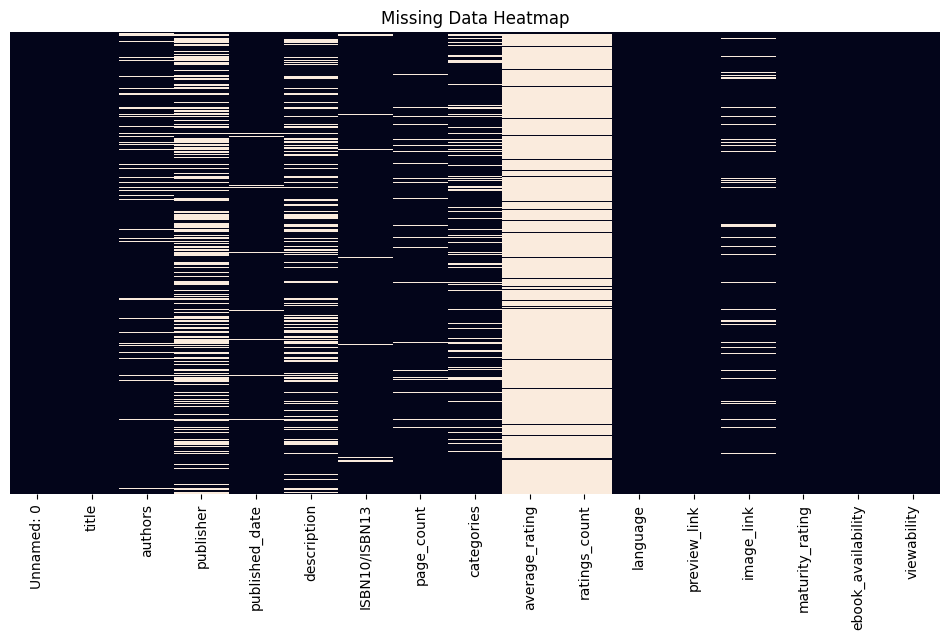

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False,yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

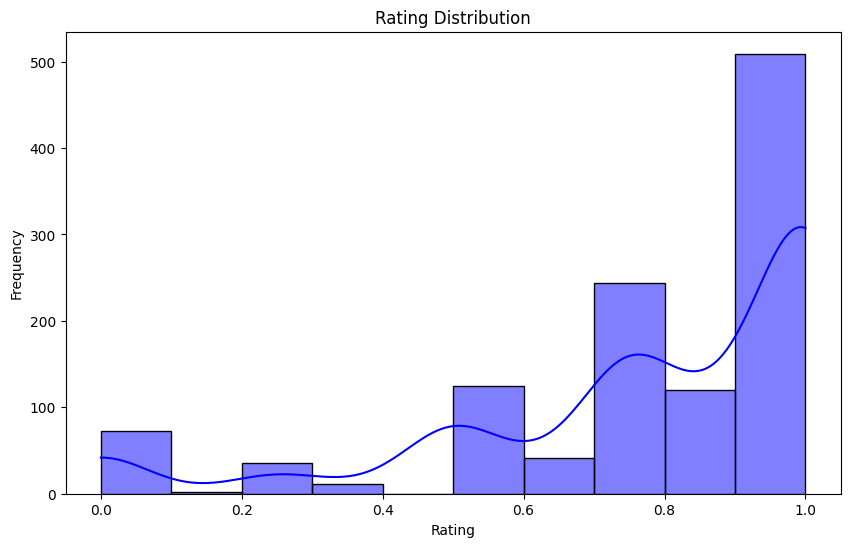

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], bins=10, kde=True, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [12]:
df.average_rating.value_counts()

average_rating
1.000    509
0.750    244
0.500    125
0.875    120
0.000     72
0.625     41
0.250     36
0.375     11
0.125      2
Name: count, dtype: int64

In [14]:
# Show top 20 authors by mean rating
mean_rating_by_author = df.groupby('authors')['average_rating'].mean().sort_values(ascending=False)
print(mean_rating_by_author.head(20))

authors
('Winnie Holzman',)                                   1.0
('Whitney Johnson',)                                  1.0
('Walter Dean Myers',)                                1.0
('Walter Dean Myers', 'Guy A. Sims')                  1.0
('Wade T. Wilson',)                                   1.0
('W. Gerrod Parrott',)                                1.0
('W. Chan Kim', 'Renee Mauborgne')                    1.0
('Vincent Douglas', 'School Specialty Publishing')    1.0
('Victor Raskin',)                                    1.0
('Vicky Weber',)                                      1.0
('American Nurses Association',)                      1.0
('American Lung Association',)                        1.0
('Amanda Palmer',)                                    1.0
('Alva Noë', 'Evan Thompson')                         1.0
('Alix E. Harrow',)                                   1.0
('Alfred P Sloan',)                                   1.0
('Alfred Lansing',)                                   1.0
('Alex

AttributeError: 'numpy.float64' object has no attribute 'index'

<Figure size 1000x600 with 0 Axes>